# Operations Room optimization
## Importing data

In [1]:
# Configure plotting in Jupyter
from matplotlib import pyplot as plt
%matplotlib inline
plt.rcParams.update({
    'figure.figsize': (7.5, 7.5)})
# Seed random number generator
from numpy import random as nprand
seed = hash("Ops-room in Python") % 2**32
nprand.seed(seed)
import datetime as dt

import pandas as pd
from pandas import ExcelWriter
from pandas import ExcelFile
from pathlib import Path

import os
directory=os.getcwd()
print(directory)

/Users/kultiginbozdemir/Documents/GitHub/or_club/op_room


In [2]:
# read excel file
filename='./data/OP-Benchmarking_Datenerfassung_2020_hsrw.xlsm'
xls1 = pd.ExcelFile(filename)

df_ops = pd.read_excel(xls1, skiprows=7, sheet_name='Operationen',skipfooter=0)
df_op = pd.read_excel(xls1, skiprows=4, sheet_name='Saal.Nutzung',skipfooter=0)
df_dep = pd.read_excel(xls1, skiprows=4, sheet_name='Abteilungen',skipfooter=0)

### Operation Rooms Capacities

In [3]:

d_df=df_op.copy()
d_df.columns

d_df=d_df[['gültig von','gültig bis','Saal-ID', 'Saalnutzung','Saalnutzung.1','Saalnutzung.2','Saalnutzung.3', 'Saalnutzung.4']]

#df_dep.drop(0, inplace=True)
d_df=d_df[1:14].fillna(0)
d_df.rename(columns={'gültig von':'from','gültig bis':'until','Saal-ID':'hall', 'Saalnutzung':'Monday','Saalnutzung.1':'Tuesday','Saalnutzung.2':'Wednesday','Saalnutzung.3':'Thursday', 'Saalnutzung.4':'Friday'}, inplace=True)

d1_df=d_df[0:8]

d2_df=d_df.loc[[1,2,9,4,10,11,12,13]]



Jul=d2_df.set_index('hall')

Jul=Jul.iloc[:,[2,3,4,5,6]].astype(int)

Jan=d1_df.set_index('hall')
Jan=Jan.iloc[:,[2,3,4,5,6]].astype(int)


In [4]:
Jan['Friday'].sum()

3313

### Department Capacities

In [5]:

ddf=df_dep.copy()
ddf.columns
ddf.columns=ddf.columns.str.replace(' ','',regex=True)
ddf.columns=ddf.columns.str.replace("\n","")
ddf.columns=ddf.columns.str.replace(".","")
ddf=ddf[['Abteilungs-ID','Montag','Dienstag','Mittwoch','Donnerstag','Freitag',]]
ddf.head(10)
#df_dep.drop(0, inplace=True)
ddf=ddf[1:9].fillna(0)
ddf.rename(columns={'Abteilungs-ID':'dep_id', 'Montag':'Monday', 'Dienstag':'Tuesday', 'Mittwoch':'Wednesday', 'Donnerstag':'Thursday','Freitag':'Friday'}, inplace=True)





ddf=ddf.set_index('dep_id')


ddf=ddf.iloc[:,[0,1,2,3,4]].astype(int)
ddf.head(10)


,Monday,Tuesday,Wednesday,Thursday,Friday
dep_id,,,,,
CH1,667,660,555,555,600
CH2,330,435,330,382,322
CH3,600,435,435,435,540
HT,260,200,260,200,100
IM1,0,0,0,0,0
IM2,825,825,825,825,825
OR1,930,555,825,495,495
OR2,0,0,0,0,0


In [6]:
ddf['Friday'].sum()

2882

## Slice the dataframe

In [7]:
df=df_ops.copy()


df.columns=df.columns.str.replace(' ','_',regex=True)
df.columns=df.columns.str.replace("\n","")
df.columns=df.columns.str.replace(".","")
print(df.columns)

df=df[['Fallnummer_(analog_zu_§_21-Daten)', 'Datum', 'Saal-ID',
       'Fallart', 'Abteilungs-ID', 'Dringlichkeit', 'O8', 
       'O10',  'OPS_1','OPS_2','OPS_3','OPS_4','OPS_5']]
df=df.drop(df.index[[0,1,2,3,4]])

df = df.rename(columns={'O8': 'begin_time', 'O10':'end_time','Fallnummer_(analog_zu_§_21-Daten)': 'Fallnummer' })
#df['Dringlichkeit']=df['Dringlichkeit'].astype(int)
df.head()


#df['begin_time'].unique()

df.tail()

#Delete nan rows
df=df.dropna(subset = ["begin_time"], inplace=False)

#df[df['begin_time'].isna()==True]

df['begin_time']=pd.to_datetime(df['begin_time'], errors='coerce')
df['end_time']=pd.to_datetime(df['end_time'], errors='coerce')
#df.info()


# Calculate operation time
df['op_time']=df['end_time']-df['begin_time']
df['op_time']=df['op_time'].dt.total_seconds()/60

df.head(3)

Index(['Prü-fung', 'Fallnummer_(analog_zu_§_21-Daten)', 'Datum', 'Saal-ID',
       'Fallart', 'Abteilungs-ID', 'Dringlichkeit', 'Narkoseverfahren',
       'Unnamed:_8', 'O1', 'O2', 'O3', 'O4', 'O5', 'O6', 'O7', 'O8', 'O9',
       'O10', 'O11', 'O12', 'Unnamed:_21', 'A1', 'A2', 'A3', 'A4', 'A5', 'A6',
       'A7', 'A8', 'A9', 'A10', 'A11', 'A12', 'A13', 'A14', 'A15', 'A16',
       'Unnamed:_38', 'P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8', 'P9',
       'P10', 'Unnamed:_49', 'OPS_1', 'OPS_2', 'OPS_3', 'OPS_4', 'OPS_5',
       'Unnamed:_55', 'Unnamed:_56', 'D', 'E', 'F', 'G', 'H', 'Q<S_?',
       'AB<AC<AE_?', 'AY-BC', 'Q', 'S', 'AB', 'AC', 'AE', 'C', 'Zei_vollst',
       'Doppelte_OPS', 'OP_>_1_Tag', 'Anä_>_1_Tag', 'S<AE_?', 'AB<Q?', 'AC<Q?',
       'Saal_mit_Gültigkeit_angelegt', 'Schnitt-Dat_=_OP-Dat?',
       'OP-Überlappung', 'Unnamed:_81', 'Unnamed:_82', 'Unnamed:_83',
       'Unnamed:_84', 'Spalte', 'Zeile', 'Beginn', 'Ende', 'Rüst', 'Rüst1',
       'Beginn_korr', 'Ende_korr', '

,Fallnummer,Datum,Saal-ID,Fallart,Abteilungs-ID,Dringlichkeit,begin_time,end_time,OPS_1,OPS_2,OPS_3,OPS_4,OPS_5,op_time
5,1563301,2019-01-01,HKL1,s,IM2,3.0,2019-01-01 00:25:00,2019-01-01 01:40:00,1-275.0,1-275.5,3-605,8-837.00,NaN,75.0
6,1563300,2019-01-01,HKL1,s,IM2,3.0,2019-01-01 10:06:00,2019-01-01 10:20:00,1-275.0,3-605,NaN,NaN,NaN,14.0
7,1563260,2019-01-01,HKL1,s,IM2,3.0,2019-01-01 16:21:00,2019-01-01 17:18:00,1-275.0,8-837.00,8-837.m0,8-83b.08,8-83b.c5,57.0


Text(0, 0.5, 'Number of ops per department')

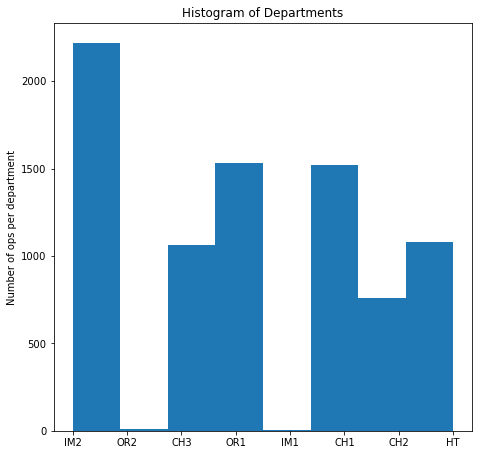

In [8]:
plt.hist(df['Abteilungs-ID'], bins=len(df['Abteilungs-ID'].unique()))
plt.title('Histogram of Departments' )
plt.ylabel('Number of ops per department')

In [9]:
df=df[df['Abteilungs-ID'].isin(['OR2','IM1'])==False]

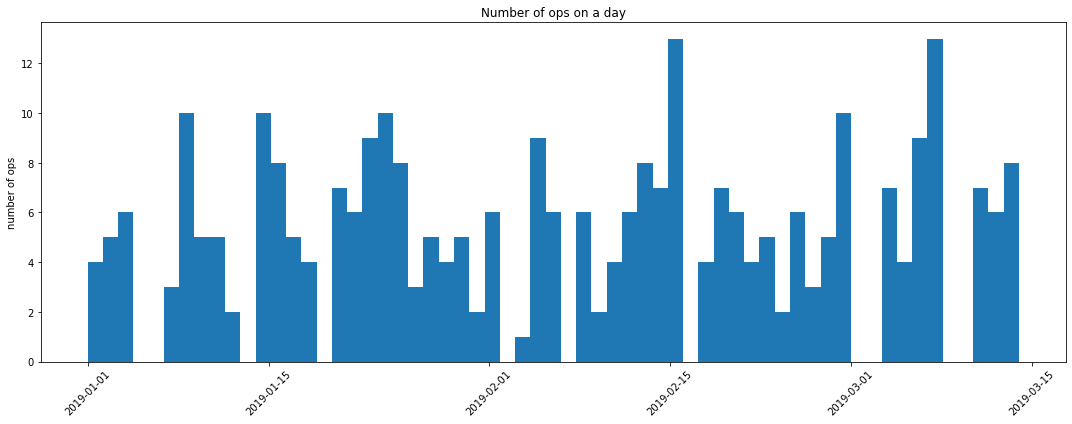

In [10]:
plt.figure(figsize=(15, 6))
plt.hist(df["Datum"].head(300), bins=len(list(set(df["Datum"].head(300)))))
plt.title('Number of ops on a day' )
plt.ylabel('number of ops')
plt.xticks(rotation=45)
plt.tight_layout()

In [11]:
# Remove out of working time operations, probably emergencies. 
mask=(df['begin_time'].dt.hour<7)|(df['begin_time'].dt.hour>18)
print(mask.describe())
df.drop(df[mask==True].index, inplace=True)

count      8183
unique        2
top       False
freq       7915
Name: begin_time, dtype: object


In [12]:
df.shape

(7915, 14)

### To create a dataframe for weights and values
We mine data to generate weight and value of an operation.
Here we follow a simple way; we take the mean time of every type of operation as a weight.
Value equals to the urgency level for now.
This attributes will be used in the knapsack problem.

In [13]:
df.columns

Index(['Fallnummer', 'Datum', 'Saal-ID', 'Fallart', 'Abteilungs-ID',
       'Dringlichkeit', 'begin_time', 'end_time', 'OPS_1', 'OPS_2', 'OPS_3',
       'OPS_4', 'OPS_5', 'op_time'],
      dtype='object')

In [14]:
# To mine data to get usefull info for weight and value coefficients.
# Weight of an op is the operation time.
# value is the urgency level (Dringlichkeit)
# Later on, waiting time in the basket can also be used for profit coefficient assignments.
df['ops'] = df[df.columns[8:13]].apply(
    lambda x: ','.join(x.dropna().astype(str)),
    axis=1
)
df


df2=df.groupby('ops').agg({'op_time':['median']}).astype(int)
df2[['mean','min','max']]=df.groupby('ops').agg({'op_time':['mean','min','max']})

df2['std']=df.groupby('ops')['op_time'].std()
df2['count']=df.groupby('ops').size()
df2.columns=['median','mean','min','max', 'std', 'count']



df2.head(5)

,median,mean,min,max,std,count
ops,,,,,,
"1-265.1,1-265.0,1-265.8",77,77.000000,77.0,77.0,NaN,1
1-265.4,40,59.571429,17.0,125.0,39.677269,7
"1-265.4,1-266.3",60,66.954545,38.0,110.0,20.557648,22
"1-265.4,1-266.3,1-268.0",79,79.250000,54.0,105.0,21.391198,4
"1-265.4,1-266.3,1-268.0,8-640.0,8-835.30",257,257.000000,257.0,257.0,NaN,1


In [15]:
print('count of op types is',df2.shape[0])
print('ops having sample size larger than 8: is',df2[df2['count']>8].shape[0])

# it means , almost 15% of data have a sample size larger than 8. Can we trust it?

df.index.is_unique # index will be used to identify the operations

count of op types is 3484
ops having sample size larger than 8: is 85


True

### Operations frequency

In the following section we simulate the our knapsack problem.
Knapsack algoritm return the results day by bay.
The operations will be put in a pool after they were processed by the departments.
The algoritm will run and allocate the ops to the operations room.<br>
We need to know how many operations are registered in a day. However we cannot get this information from the data set.  It requires further collaboration with the hospital.<br> Nevertheless, we can have a look at the data which shows the executed operations through the year.

In [16]:
# To create a dataframe by grouping the days
df3=pd.DataFrame()
df3[['count','total_time','median','mean','min','max']]=df.groupby('Datum').agg({'op_time':['size','sum','median','mean','min','max']})

df3.head()

,count,total_time,median,mean,min,max
Datum,,,,,,
2019-01-01,5,205.0,35.0,41.000000,14.0,70.0
2019-01-02,14,1197.0,53.0,85.500000,18.0,387.0
2019-01-03,30,1886.0,46.0,62.866667,7.0,467.0
2019-01-04,26,1168.0,33.5,44.923077,2.0,115.0
2019-01-05,1,44.0,44.0,44.000000,44.0,44.0


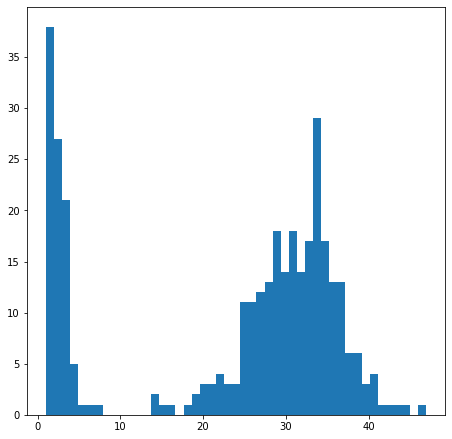

In [17]:
plt.hist(df3['count'], bins=max(df3['count']))
print('')

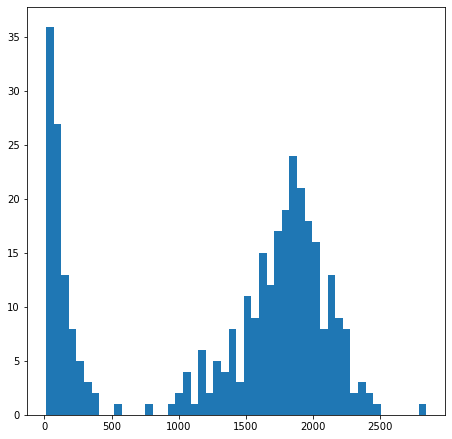

In [18]:

plt.hist(df3['total_time'], bins=50)
print('')

In [19]:
# Those days are usually at the weekends or national holidays. 

rmv=list(df3[df3['count']<10].index)
df=df[df['Datum'].isin(rmv)==False]
df3.drop(rmv, inplace=True)

## Capacity of the resources
We get this information from the excel file.
Although, OR2 and IM1 departments are not provided or constrained on the excel sheet, they have some operations on the operations data set. To navigate around this confusion, I simply assigned constraints 444 and 333 respectively.

In [20]:
# departments
deps=['CH1', 'CH2', 'CH3', 'HT', 'IM1', 'IM2', 'OR1', 'OR2']

# Departments capacities
deps_cap=[660, 435, 600,260,0, 825, 930,0]
sum(deps_cap)

def departments(day):
    return(ddf[day])






In [21]:
# Operations room names
#It is mentioned on the excel sheet that only 5 op_rooms are included in central planning. 
op_rooms=list(set(list(df['Saal-ID'])))

op_rooms=sorted(op_rooms)
op_rooms

# Operation rooms capacities
op_rooms_cap=[435, 390, 555, 555 ,555,435,435,320]


def op_rooms(datum):
    
    if  datum > dt.datetime.strptime('2019-07-01','%Y-%m-%d'):
        return(Jul[datum.strftime('%A')])
    else:
        return (Jan[datum.strftime('%A')])



# Operations basket simulation

# Simulation starts!
### An operation is registered and transfered to the basket
<br>
We assume that the Hospital has a strategy of FIFO for its services. <br>
Every single day is a large basket for the operations registered by the departments. After every operatin's registration, algoritm runs and returns a solution for the optimal allocations. That means, time schedule of the operations can be different after every run, since it looks for the optimal allocation. The hospital staff do not promise the patient for a particular time slot. The hospital promises only the date. <br> 
Once the last registrated operation causes the algoritm to hit the constraints and to fail the assigning of all operations in the basket to the operation rooms, it stops there and rejects the last registration.  The previous solution which assigns all the operations in the into the operation-rooms remains the last valid solution. <br> 


In [22]:
# Basket
basket=pd.DataFrame(columns=['Abteilungs-ID','ops','weight','value'])


# We randomly choose an operation from the data set. This represents the new operation which is preprocessed and registered in to the basket. 
# We populate also relavent attributes like weight and value.

import random


def populate_basket():
    basket_weight=sum(basket['weight'])
    #print('total time in the basket:',sum(basket['weight']))
    
    ind=random.choice(df.index)
    #print('operation index:',ind)
    basket.loc[ind,'ops']=df.loc[ind,'ops']
    basket.loc[ind,'Abteilungs-ID']=df.loc[ind,'Abteilungs-ID'] 
    basket.loc[ind,'value']=df.loc[ind,'Dringlichkeit']
    basket.loc[ind, 'weight']=df2.loc[df.loc[ind,'ops'],'median']
    basket_weight+=df2.loc[df.loc[ind,'ops'],'median']
    #print('after registration total time:',sum(basket['weight']))
    return(ind)

In [23]:
basket.tail(1)

,Abteilungs-ID,ops,weight,value


In [24]:
from ortools.linear_solver import pywraplp
def create_data_model(datum):
    """Create the data for the example."""
    data = {}

    w = list(basket['weight'])
    v = list(basket['value'])
    d= list(basket['Abteilungs-ID'])
    l=list(basket.index)
    items=list(zip(l,w,v,d)) # item_no, weight, value, department
    

    data['items'] = items
    
    opr=op_rooms(datum)
    data['bins'] = list(zip(list(opr.index),list(opr)))
    data['bin_capacities'] = list(opr)
    

    deps=departments(datum.strftime('%A'))
    data['deps'] = list(zip(list(deps.index),list(deps)))
    data['dep_capacities'] = list(deps)
    return data

### Knapsack Problem Solving
### Optimization with Google OR tools
Please visit the following website for the tutorials and documentation. 

https://developers.google.com/optimization/introduction/python

In [30]:
# We simulate the flow of operations into the pool with while loop.
#Normally, the algorihtm will be executed every time when an operation is tried to be registered. 
# This registration process can continue until one day or one week before the operation.
# It depends on the internal process of the hospital.
#But until it is frozen, flow of ops continues. This while loop serves that. 
def simulation(datum):
    basket.drop(basket.index, inplace=True) # to clean the basket for the day
    loop_num=50 # This number will be used to break the while loop. 
    count=0
    total_weight=0
    while basket.shape[0]<=count:
        #print('basket size:',basket.shape[0], 'count:',count)
        # Create the mip solver with the SCIP backend.
        solver = pywraplp.Solver.CreateSolver('SCIP')
        ind=populate_basket()
        data=create_data_model(datum)
        #data


        # Variables
        # x[i, j] = 1 if item i is packed in bin j.
        x = {}
        for i,w,v,d in data['items']:
            for j,c in data['bins']:
                x[(d,i, j)] = solver.IntVar(0, 1, 'x_%s_%s_%s' % (d,i, j))

        #print('number of variables',len(x))

        # Constraints
        # Each item can be in at most one bin.
        for i,w,v,d in data['items']:
            solver.Add(sum(x[(d,i, j)] for j,c in data['bins']) <= 1) # department_no, item_no, bin_no


        #print('Number of constraints =', solver.NumConstraints())

        # The amount packed in each bin cannot exceed its capacity.
        for j,c in data['bins']:
            solver.Add(
                sum(x[(d,i, j)] * w
                    for i,w,v,d in data['items']) <= c)

        #print('Number of constraints =', solver.NumConstraints())

        # The dapertment cannot exceed its capacity

        #for k in data['deps']:
        for k,u in data['deps']:
            total=0
            for i,w,v,d in data['items'] :
                for j,c in data['bins']:
                    if d==k:
                        total+= x[(d,i, j)]*w
            solver.Add(total <= u)

        #print('Number of constraints =', solver.NumConstraints())

        # Objective
        objective = solver.Objective()

        for i,w,v,d in data['items']:
            for j,c in data['bins']:
                objective.SetCoefficient(x[(d,i, j)], v)
        objective.SetMaximization()

        status = solver.Solve()
        count=sum(v.solution_value() for k,v in x.items())

        

        # Check the solution allocates all the registered operations to the op_rooms.
        # If it fails, reject the this solution and this new item (operation) and continue with the previous solution. 


        if basket.shape[0]>count:
            loop_num -=1
            #print('Sorry,',ind,', we cannot offer you a time slot on that day.')
            #print('Algoritm excludes: ',basket.shape[0]-count, ' from the op-rooms allocation.' )
            basket.drop(ind, inplace=True)

            if loop_num<=0:
                #... more tries for the hope of having a thiny operation in terms of op_time
                break
        else:
            continue
            print(ind, "registered for the operation.")
            
        if status == pywraplp.Solver.OPTIMAL:


            total_weight = 0

            for j,c in data['bins']:
                bin_weight = 0
                bin_value = 0

                for i,w,v,d in data['items']:
                    if x[(d,i, j)].solution_value() > 0:
                        #print('Item', i,'-department:', d, '- weight:', w, ' value:', v)
                        bin_weight += w
                        bin_value += v

                total_weight += bin_weight
            #print('.........')
            #print('Total planned op value:', objective.Value())    
            #print('Total planned  op time:', total_weight)
            #print("Basket total weight", basket["weight"].sum())
            #print('Total number of ops:', count) 
            
            #print('We will inform you about the exact time of the operation.')
            

        else:
            print('The problem does not have an optimal solution.')
            #break
    return(count, total_weight, objective.Value())

In [31]:
basket

,Abteilungs-ID,ops,weight,value
1839,IM2,8-152.0,28,1
11,IM2,1-275.0,16,1
5715,OR1,"5-814.4,5-782.b0,5-812.01",76,1
2478,CH1,"5-502.1,1-694,5-469.21,8-923.1,8-925.02",124,1
6354,CH1,"5-511.11,1-694,5-469.21,8-925.02",52,1
...,...,...,...,...
6727,CH1,5-511.11,63,1
9,IM2,1-275.0,16,1
311,IM2,1-275.0,16,1
6316,CH1,"5-493.5,8-915",20,1


In [35]:
df3.head()

,count,total_time,median,mean,min,max,sim_weight,sim_count,sim_value
Datum,,,,,,,,,
2019-01-02,14,1197.0,53.0,85.500000,18.0,387.0,3176.0,75.0,79.0
2019-01-03,30,1886.0,46.0,62.866667,7.0,467.0,2827.0,64.0,64.0
2019-01-04,26,1168.0,33.5,44.923077,2.0,115.0,2759.0,60.0,68.0
2019-01-07,24,1330.0,43.0,55.416667,4.0,237.0,3368.0,74.0,78.0
2019-01-08,28,1666.0,43.5,59.500000,5.0,250.0,3059.0,69.0,71.0


In [36]:
for ind, row in df3.iterrows():
    #print()
    #print(list(op_rooms(row['Datum'])))
    #print(list(op_rooms(row['Datum'],row['Datum'].strftime('%A'))))
    #print(departments(row['Datum'].strftime('%A')))
    count,total_weight,value=simulation(ind)
    df3.loc[ind,"sim_weight"]=total_weight
    df3.loc[ind,"sim_count"]=count
    df3.loc[ind,"sim_value"]=value
    #print(ind,'....',simulation(ind))

In [37]:
df3.tail()

,count,total_time,median,mean,min,max,sim_weight,sim_count,sim_value
Datum,,,,,,,,,
2019-12-18,29,1426.0,42.0,49.172414,2.0,163.0,2929.0,71.0,77.0
2019-12-19,22,1386.0,39.5,63.000000,5.0,207.0,2693.0,54.0,58.0
2019-12-20,27,1475.0,52.0,54.629630,5.0,144.0,2820.0,62.0,66.0
2019-12-23,14,530.0,31.0,37.857143,11.0,82.0,3507.0,70.0,72.0
2019-12-27,16,803.0,54.5,50.187500,2.0,103.0,2837.0,61.0,67.0


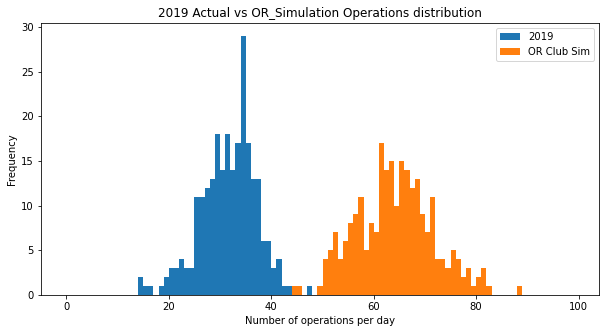

In [65]:
plt.figure(figsize=(10, 5))
#plt.subplot(1, 2, 1)
plt.hist(df3['count'], bins=range(0,100,1), label="2019")
plt.hist(df3['sim_count'], bins=range(0,100,1),label="OR Club Sim")
plt.legend()
plt.title('2019 Actual vs OR_Simulation Operations distribution')
plt.xlabel('Number of operations per day')
plt.ylabel('Frequency')
print('')


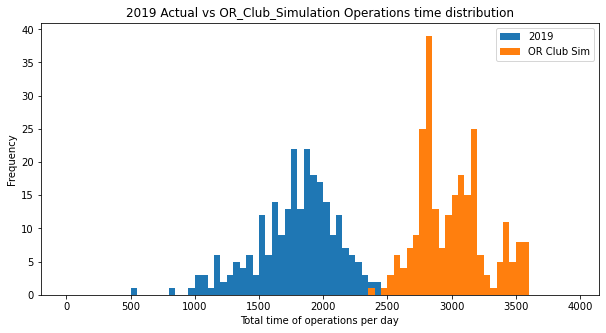

In [66]:
plt.figure(figsize=(10, 5))

plt.hist(df3['total_time'],  bins=range(0,4000,50), label="2019")
plt.hist(df3['sim_weight'],  bins=range(0,4000,50), label="OR Club Sim")
plt.legend()
plt.title('2019 Actual vs OR_Club_Simulation Operations time distribution')
plt.xlabel('Total time of operations per day')
plt.ylabel('Frequency')
print('')





In [60]:
# Op-room constraints
for col in ddf.columns:
    print(ddf[col].sum(), col)

3612 Monday
3110 Tuesday
3230 Wednesday
2892 Thursday
2882 Friday


In [61]:
# Department constraints by Jan till July
for col in Jan.columns:
    print(Jan[col].sum(), col)

3434 Monday
3434 Tuesday
3434 Wednesday
3434 Thursday
3313 Friday


In [62]:
# Department constraints by July
for col in Jul.columns:
    print(Jul[col].sum(),col)

3675 Monday
3434 Tuesday
3554 Wednesday
3555 Thursday
3356 Friday


In [63]:
df.to_csv('./data/ops.csv')